In [69]:
import importlib
from sklearn.datasets import load_digits
import zlib
import json

import numpy as np

import run_ambreducer as ramb
importlib.reload(ramb)

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import os

In [80]:
### read datasets

def read_dataset_by_path(path):
	path_data = path + "data.bin"
	path_labels = path + "label.bin"
	## open the data and label binary file
	with open(path_data, 'rb') as f:
		data_comp = f.read()
	with open(path_labels, 'rb') as f:
		labels_comp = f.read()
	## convert the data and label to np array
	data = np.array(json.loads(zlib.decompress(data_comp).decode('utf8')))
	labels = np.array(json.loads(zlib.decompress(labels_comp).decode('utf8')))

	return data, labels


data, labels = read_dataset_by_path("../labeled-datasets/compressed/fashion_mnist/")
raw = PCA(n_components=100).fit_transform(data)

raw.shape

(3000, 100)

In [81]:

method = "tsne"
metric = "snc"
init_points = 8
n_iter = 40

results = ramb.run(raw, method=method, metric=metric, threshold_loss=0.10, S=3.0, verbose=2, init_points=init_points, n_iter=n_iter)



|   iter    |  target   | perple... |
-------------------------------------
|  1        |  0.4172   |  211.4    |
|  2        |  0.422    |  361.6    |
|  3        |  0.3733   |  5.057    |
|  4        |  0.4192   |  154.7    |
|  5        |  0.4104   |  77.64    |
|  6        |  0.4097   |  50.71    |
|  7        |  0.4184   |  97.2     |
|  8        |  0.4213   |  176.1    |
|  9        |  0.4151   |  363.1    |
|  10       |  0.4172   |  356.2    |
|  11       |  0.4187   |  169.4    |
|  12       |  0.4176   |  183.1    |
|  13       |  0.4174   |  161.7    |
|  14       |  0.419    |  146.2    |
|  15       |  0.4186   |  137.7    |
|  16       |  0.418    |  105.8    |
|  17       |  0.4191   |  129.2    |
|  18       |  0.4194   |  121.1    |
|  19       |  0.4196   |  113.8    |
|  20       |  0.4158   |  201.5    |
|  21       |  0.4204   |  220.8    |
|  22       |  0.4162   |  227.3    |
|  23       |  0.4132   |  89.84    |
|  24       |  0.419    |  191.6    |
|  25       

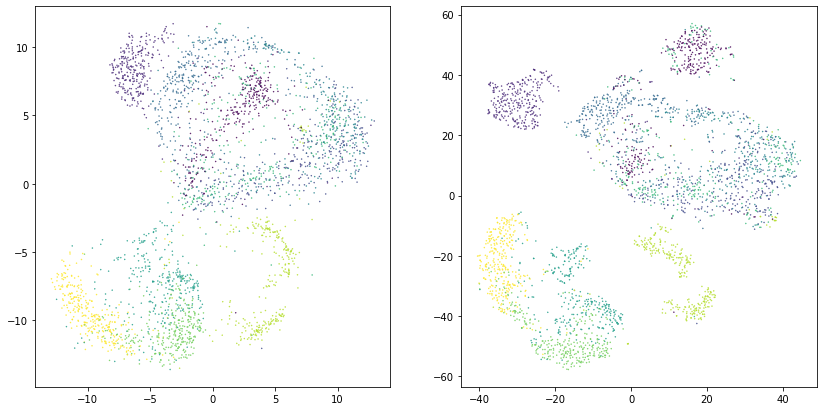

In [84]:



fig, ax = plt.subplots(1, 2, figsize=(14, 7))

init_emb = results["init_emb"]
final_emb = results["final_emb"]

ax[0].scatter(init_emb[:, 0], init_emb[:, 1], s=0.5, c=labels)
ax[1].scatter(final_emb[:, 0], final_emb[:, 1], s=0.5,c=labels)

In [83]:
results

{'init_emb': array([[-10.13354   ,  -8.969022  ],
        [ -2.0672858 ,  -0.88222003],
        [ -4.349161  ,   5.4143405 ],
        ...,
        [  3.88675   ,   7.7174535 ],
        [ -5.2325587 ,  -7.5998755 ],
        [  7.73005   ,   2.5622249 ]], dtype=float32),
 'final_emb': array([[-34.699997 , -19.182123 ],
        [ -3.4176047,   4.892777 ],
        [-13.559943 ,  24.277008 ],
        ...,
        [ 12.216458 ,  48.9523   ],
        [-18.4276   , -33.39087  ],
        [ 32.844418 ,  -4.922357 ]], dtype=float32),
 'init_loss': 0.4178905514096792,
 'final_loss': 0.692447553056344,
 'max_hyperparameter': {'perplexity': 48.23053343585468},
 'initial_embiguity': 0.4078718909953941,
 'final_ambiguity': 0.307552446943656,
 'init_max_hyperparameter': {'perplexity': 361.56062425386824}}